# Polymer network plots 

version for paper with parallel runs 

### Observations 

For std conditions: 
even for epsilon = 1, there is a fraction of 0.3 of largest cluster in polymer network 
maximum number of neighbours for epsilon = 5 is 8-9 
bimodal distribtuion of polymer degree

question of rigidity percolation: crosslinker bonding distribution change and comparision with polymer network neighours  

kb0 really different in terms of packing fraction with epsolon from all the others 

pl: maximum goes linearly 
rho: not yet percolated at low epsilon and thats why interestin to look at 

### Open questions 
* why is max degree 8-9 for epsilon=5
* non monotonous behavour of max degreee for polymer network of different kb: 
  thesis: 
  very flexible: wrapped around itself == not so many crosslink bonds 
  semi-flexible: maximum degreees, because flexible enough to bend but stiff enough to not wrapp around itself 
  stiff: to stiff to bend to form enough bonds
  
  how many bonds can be formed maximally? what is the maximum bond distribution of polymer degree? 


### Todos for exisiting plots 

* Nb: poisson verteilung  X 
 
* Number of partilces without crosslinker: in polymer_inital file: welches monomer ist crosslinker   
mittlewert reicht, abhaengig von pl  X 

* Interessant: number of unbonded crosslinkers as function of epsilon 

* ad FIG 1.1: y axis starting at 0 X 

* FIG 1.2: histogram, split plot oder linien X 
  
* FIG 2.1: kb plot same scale as above, todo  compare with crosslinker level X 

* FIG 3.3 pl 0.2 und epsilon = 1 stark verbundenes Netzwerk aber keine Crosslinker Cluster 


#### Fehlende Plots 
epsilon 1 - 5: showing the onset of heterogeneity  X 

kb: selfbonding, semiflexible and stiff X 

pl: high pl, high percolation versus heterogenity at epsilon 5 and plink 0.1 X 


#### TODO 
* cluster size distribution for std and kb X 
* pore size distribution 
* network plots X 
* plot for high pl and low epsilon 
* finish snapshots X 

Optional: 



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

def parse_file(file):
    df = pd.read_pickle(file)
    df_param = pd.read_csv("parameters.txt", delim_whitespace=True, dtype='str')
    df_param.rename(columns = {'ID':'state_id'}, inplace=True)
    df_param = df_param.astype({'N': float, 'rho':float, 'state_id':str,'kb': float, 'plink':float, 'epsilon':float})
    Nmax=51000

    df_param['Nparticles'] = (Nmax*df_param.rho)/df_param.N
    
    df = pd.merge(df,df_param, on='state_id')
    df = df.astype({'state_id':str, 'time': int, 'N': float, 'kb': float, 
                'plink':float, 
                'rho':float, 'epsilon':float, 
                'largest_domain':float, 'node_connectivity':int, 'pstart':str })
    
    return df,df_param

In [2]:
np.exp(-3)

0.049787068367863944

In [3]:
def get_degree_and_domain_plot(df,df_param,x,name,label, level, colormap):
    
    std_cond = {'epsilon': 5, 'rho':0.2, 'kb':30,'N':30,'plink':0.1}
    
    for key, val in std_cond.items():
         if key!=x:
                df = df[df[key] == val]
    
    
    df_s = pd.DataFrame({"domain_lengths": df.groupby('state_id').domain_lengths.apply(list)}).reset_index()

    df_s.domain_lengths = df_s.domain_lengths.apply(lambda x: [ item for sublist in x for item in sublist])
    df_s = pd.merge(df_s,df_param, on='state_id')
    
    
    df_d = pd.DataFrame({"degree_sequence": df.groupby('state_id').degree_sequence.apply(list)}).reset_index()
    df_d.degree_sequence = df_d.degree_sequence.apply(lambda x: [ item for sublist in x for item in sublist])
    df_d = pd.merge(df_d,df_param, on='state_id')
    
    
    df['percentage_largest'] = df.largest_domain/df.Nparticles
    df_p = pd.DataFrame({'mean_percentage_largest' : df.groupby('state_id').percentage_largest.mean(),
                  'std_percentage_largest' : df.groupby('state_id').percentage_largest.std()}).reset_index()
    df_p = pd.merge(df_p,df_param, on='state_id')
    
    
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(17,5))
     
    color_list = sns.color_palette(colormap, len(df_s[x].unique()))
    color_dict=dict(zip(sorted(df_s[x].unique()), color_list))    
    

    # degree plot 
    max_total=30   
    for lx, x_i in enumerate(sorted(df_d[x].unique())):
        di = df_d[(df_d[x] == x_i)]
        arr= di['degree_sequence'].values
        bins=np.max(arr[0])
        
        hist, bin_edges = np.histogram(np.array(arr[0]), bins=bins, normed=True, density=True)
        xarr = bin_edges[:-1]
                                      
                                      
        ax1.plot(xarr, hist, marker='o', color=color_dict[x_i], lw=2, label="{} = {}".format(label,x_i))
        ax1.set_xlabel("{} degree".format(level), fontsize=16)
        ax1.set_ylabel("P", fontsize=16)
        ax1.set_xlim((0,max_total))
        ax1.set_ylim((0,0.55))
        ax1.tick_params(axis='both', which='major', labelsize=16)
        plt.tight_layout()
    
    
    #domain size 
    ax2.set_yscale('log')
    for lx, x_i in enumerate(sorted(df_s[x].unique())):
        di = df_s[(df_s[x] == x_i)]
        arr= di['domain_lengths'].values
        bins=int(np.floor(np.max(arr[0])/10))
        
        hist, bin_edges = np.histogram(np.array(arr[0]/di['Nparticles'].values), bins=bins, normed=True, density=True)
        xarr = bin_edges[:-1]
                                      
                                      
        ax2.plot(xarr, hist, color=color_dict[x_i], lw=2, marker='o', label="{} = {}".format(label,x_i))
        
        #ax2.hist(np.array(arr[0]/di['Nparticles'].values), 
        #         bins=bins, density=True, facecolor=color_dict[x_i], edgecolor='k',
        #        alpha=0.6)
        ax2.set_xlabel("Fractional {} domain size".format(level), fontsize=16)
        ax2.set_ylabel("P", fontsize=16)
        ax2.tick_params(axis='both', which='major', labelsize=16)
        ax2.set_ylim([0.01,35])
        plt.tight_layout()
    
    
    # percolation 
  
    arr= df_p[['mean_percentage_largest','std_percentage_largest','epsilon']].values
    arr = arr[arr[:, 2].argsort()]
    
    ax3.errorbar(arr[:,2],arr[:,0],arr[:,1], c='k', capsize=5,lw=2, alpha=0.5)
    
    for i,x_i in enumerate(sorted(df_p[x].unique())):
        ax3.plot(arr[i,2],arr[i,0], marker='o', ms=10, color=color_dict[x_i], label="{} = {}".format(label,x_i), zorder=20)
    
    
    # add line for expected number of polymers without crosslinker 
    # P = exp(-p) p = Nbeads*plink
    Nbeads=30
    plink=0.1
    x=np.arange(1,6)
    y=np.ones(5)*(1-np.exp(-Nbeads*plink))
    ax3.plot(x,y,lw=2, marker='o',color='k', linestyle='--')
    
    ax3.set_xlabel("$\epsilon$", size=25)
    ax3.set_ylabel("$R/N$", size=20)
    ax3.tick_params(axis='both', which='major', labelsize=16)
    ax3.set_ylim((0,1))
    
    plt.legend(ncol=1, bbox_to_anchor=(0.95,0.5),loc='upper right', fontsize=16)
    plt.savefig("{}_{}_triple_plot.pdf".format(name,level))



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipyker

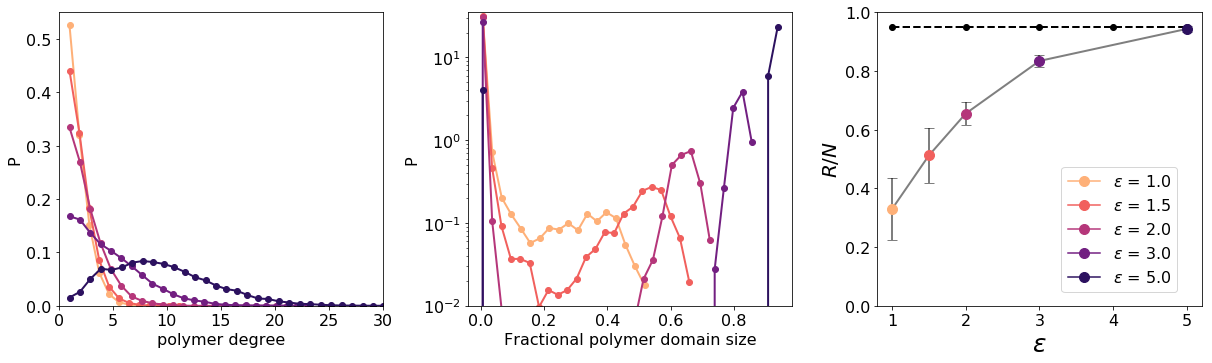

In [4]:
df,df_param = parse_file('network_data_polymer_all_runs.pickle')
get_degree_and_domain_plot(df,df_param,"epsilon","degree_domain_epsilon","$\\epsilon$", "polymer", "magma_r")

In [5]:
def get_degree_and_domain_plot_flexibility(df,df_param,x,name,label, level, colormap):
    
    df['percentage_largest'] = df.largest_domain/df.Nparticles
    df_p = pd.DataFrame({'mean_percentage_largest' : df.groupby('state_id').percentage_largest.mean(),
                  'std_percentage_largest' : df.groupby('state_id').percentage_largest.std()}).reset_index()
    df_p = pd.merge(df_p,df_param, on='state_id')


    std_cond = {'epsilon': 5, 'rho':0.2, 'kb':30,'N':30,'plink':0.1}
    
    for key, val in std_cond.items():
         if key!=x:
                df = df[df[key] == val]
    
    
    df_s = pd.DataFrame({"domain_lengths": df.groupby('state_id').domain_lengths.apply(list)}).reset_index()
    df_s.domain_lengths = df_s.domain_lengths.apply(lambda x: [ item for sublist in x for item in sublist])
    df_s = pd.merge(df_s,df_param, on='state_id')
    
    
    df_d = pd.DataFrame({"degree_sequence": df.groupby('state_id').degree_sequence.apply(list)}).reset_index()
    df_d.degree_sequence = df_d.degree_sequence.apply(lambda x: [ item for sublist in x for item in sublist])
    df_d = pd.merge(df_d,df_param, on='state_id')
    
  
    
    fig, (ax1,ax3) = plt.subplots(1,2,figsize=(12,5))
     
    color_list = sns.color_palette(colormap, len(df_s[x].unique()))
    color_dict=dict(zip(sorted(df_s[x].unique()), color_list))    
    

    # degree plot 
    max_total=35  
    
    brr = np.empty(len(df_d[x].unique()))
    
    for lx, x_i in enumerate(sorted(df_d[x].unique())):
        di = df_d[(df_d[x] == x_i)]
        arr= di['degree_sequence'].values
        bins=np.max(arr[0])
        
        hist, bin_edges = np.histogram(np.array(arr[0]), bins=bins, normed=True, density=True)
        xarr = bin_edges[:-1]
                   
        brr[lx] = xarr[np.argmax(hist)]      
                                      
        ax1.plot(xarr, hist, marker='o', color=color_dict[x_i], lw=2, label="{} = {}".format(label,x_i))
        ax1.set_xlabel("{} degree".format(level), fontsize=16)
        ax1.set_ylabel("P", fontsize=16)
        ax1.set_xlim((0,max_total))
        ax1.tick_params(axis='both', which='major', labelsize=16)
        
        plt.tight_layout()
        
    axins = fig.add_axes([0.3, 0.5, 0.15, 0.3])
    xl = np.array(sorted(df_d[x].unique()))
    axins.set_xscale('log')   
    axins.plot(xl+0.01, brr, color='k', lw=2)
    for i,x_i in enumerate(sorted(df_d[x].unique())):
        axins.plot(xl[i]+0.01, brr[i], color=color_dict[x_i], marker='o', ms=10)
    
                   
    axins.set_ylabel("max. degree".format(level), size=14)
    axins.set_xlabel(label, size=14)

 

    # percolation 
    std_cond = {'rho':0.2, 'kb':30,'N':30,'plink':0.1}
    for i, x_i in enumerate(df_p[x].unique()): 
        
        ds = df_p[df_p[x] == x_i]
        for key, val in std_cond.items():
            if key!=x:
                ds = ds[ds[key] == val]
        
        arr= ds[['mean_percentage_largest','std_percentage_largest','epsilon']].values
        arr = arr[arr[:, 2].argsort()]
        ax3.errorbar(arr[:,2],arr[:,0],arr[:,1], c=color_dict[x_i], capsize=5,lw=2, label="{} = {}".format(label,x_i))
    
    # add line for expected number of polymers without crosslinker 
    # P = exp(-p) p = Nbeads*plink
    Nbeads=30
    plink=0.1
    x=np.arange(1,6)
    y=np.ones(5)*(1-np.exp(-Nbeads*plink))
    ax3.plot(x,y,lw=2, marker='o',color='k', linestyle='--')
    
    ax3.set_xlabel("$\epsilon$", size=25)
    ax3.set_ylabel("$R/N$", size=20)
    ax3.tick_params(axis='both', which='major', labelsize=16)
    ax3.set_ylabel((0,1))
    plt.tight_layout()
    
    
    ax3.legend(ncol=1, bbox_to_anchor=(1,0.55),loc='upper right', fontsize=13)
    plt.savefig("{}_{}_kb_triple_plot.pdf".format(name,level))



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipyker

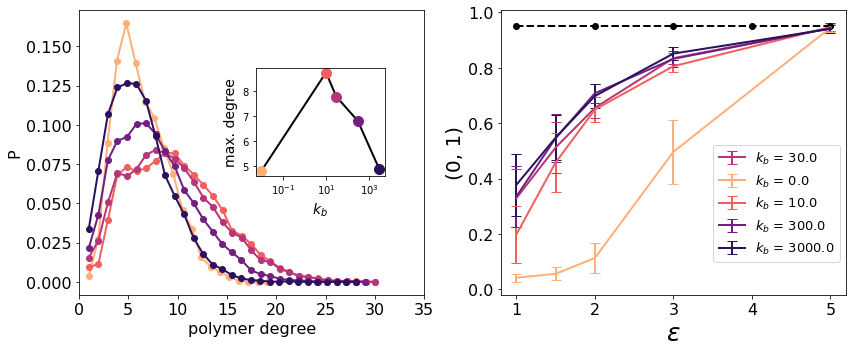

In [6]:
get_degree_and_domain_plot_flexibility(df,df_param,"kb","degree_domain_kb","$k_{b}$", "polymer", "magma_r")

In [7]:
def get_degree_and_domain_plot_pl(df,df_param,x,name,label, level, colormap):
    
    df['percentage_largest'] = df.largest_domain/df.Nparticles
    df_p = pd.DataFrame({'mean_percentage_largest' : df.groupby('state_id').percentage_largest.mean(),
                  'std_percentage_largest' : df.groupby('state_id').percentage_largest.std()}).reset_index()
    df_p = pd.merge(df_p,df_param, on='state_id')


    std_cond = {'epsilon': 5, 'rho':0.2, 'kb':30,'N':30,'plink':0.1}
    
    for key, val in std_cond.items():
         if key!=x:
                df = df[df[key] == val]
    
    
    df_s = pd.DataFrame({"domain_lengths": df.groupby('state_id').domain_lengths.apply(list)}).reset_index()
    df_s.domain_lengths = df_s.domain_lengths.apply(lambda x: [ item for sublist in x for item in sublist])
    df_s = pd.merge(df_s,df_param, on='state_id')
    
    
    df_d = pd.DataFrame({"degree_sequence": df.groupby('state_id').degree_sequence.apply(list)}).reset_index()
    df_d.degree_sequence = df_d.degree_sequence.apply(lambda x: [ item for sublist in x for item in sublist])
    df_d = pd.merge(df_d,df_param, on='state_id')
    
  
    
    fig, (ax1,ax3) = plt.subplots(1,2,figsize=(12,5))
     
    color_list = sns.color_palette(colormap, len(df_s[x].unique()))
    color_dict=dict(zip(sorted(df_s[x].unique()), color_list))    
    

    # degree plot 
    max_total=40
     
    brr = np.empty(len(df_d[x].unique()))

    
    for lx, x_i in enumerate(sorted(df_d[x].unique())):
        di = df_d[(df_d[x] == x_i)]
        arr= di['degree_sequence'].values
        bins=np.max(arr[0])
        
        hist, bin_edges = np.histogram(np.array(arr[0]), bins=bins, normed=True, density=True)
        xarr = bin_edges[:-1]
        brr[lx] = xarr[np.argmax(hist)]      
                                      
                                      
        ax1.plot(xarr, hist, marker='o', color=color_dict[x_i], lw=2, label="{} = {}".format(label,x_i))
        
        ax1.set_xlabel("{} degree".format(level), fontsize=16)
        ax1.set_ylabel("P", fontsize=16)
        ax1.set_xlim((0,max_total))
        ax1.tick_params(axis='both', which='major', labelsize=16)
        plt.tight_layout()
    
    
    axins = fig.add_axes([0.3, 0.6, 0.15, 0.3])
    xl = np.array(sorted(df_d[x].unique())) 
    axins.plot(xl+0.01, brr, color='k', lw=2)
    for i,x_i in enumerate(sorted(df_d[x].unique())):
        axins.plot(xl[i]+0.01, brr[i], color=color_dict[x_i], marker='o', ms=10)
    
                   
    axins.set_ylabel("max. degree".format(level), size=14)
    axins.set_xlabel(label, size=14)


    # percolation 
    std_cond = {'rho':0.2, 'kb':30,'N':30,'plink':0.1}
    for i, x_i in enumerate(df_p[x].unique()): 
        
        ds = df_p[df_p[x] == x_i]
        for key, val in std_cond.items():
            if key!=x:
                ds = ds[ds[key] == val]
        
        arr= ds[['mean_percentage_largest','std_percentage_largest','epsilon']].values
        arr = arr[arr[:, 2].argsort()]
        ax3.errorbar(arr[:,2],arr[:,0],arr[:,1], c=color_dict[x_i], capsize=5,lw=2, label="{} = {}".format(label,x_i))
        
        # add line for expected number of polymers without crosslinker 
        # P = exp(-p) p = Nbeads*plink
        Nbeads=30
        plink_i = x_i
        a=np.arange(1,6)
        b=np.ones(5)*(1-np.exp(-Nbeads*plink_i))
        ax3.plot(a,b,lw=2, marker='o',color=color_dict[x_i], linestyle='--', alpha=0.6, zorder=-5)
    
       
        
    ax3.set_xlabel("$\epsilon$", size=25)
    ax3.set_ylabel("$R/N$", size=20)
    ax3.tick_params(axis='both', which='major', labelsize=16)
    plt.tight_layout()
    
    
    ax3.legend(ncol=1, bbox_to_anchor=(1,0.44),loc='upper right', fontsize=13)
    plt.savefig("{}_{}_pl_triple_plot.pdf".format(name,level))




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplo

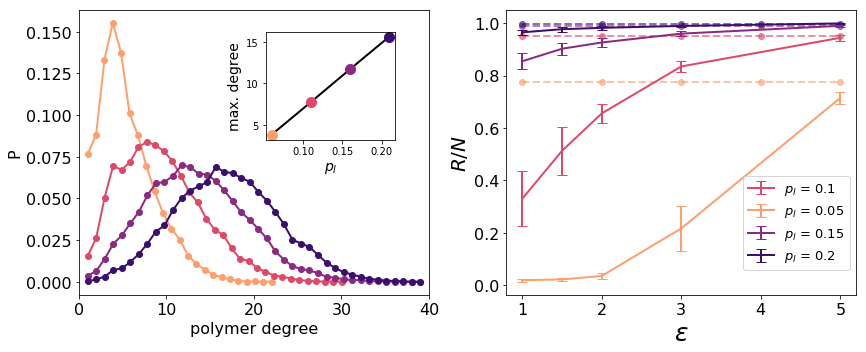

In [8]:
get_degree_and_domain_plot_pl(df,df_param,"plink","degree_domain_pl","$p_{l}$", "polymer","magma_r")

In [9]:
def get_degree_and_domain_plot_pl(df,df_param,x,name,label, level, colormap):
    
    df['percentage_largest'] = df.largest_domain/df.Nparticles
    df_p = pd.DataFrame({'mean_percentage_largest' : df.groupby('state_id').percentage_largest.mean(),
                  'std_percentage_largest' : df.groupby('state_id').percentage_largest.std()}).reset_index()
    df_p = pd.merge(df_p,df_param, on='state_id')


    std_cond = {'epsilon': 5, 'rho':0.2, 'kb':30,'N':30,'plink':0.1}
    
    for key, val in std_cond.items():
         if key!=x:
                df = df[df[key] == val]
    
    
    df_s = pd.DataFrame({"domain_lengths": df.groupby('state_id').domain_lengths.apply(list)}).reset_index()
    df_s.domain_lengths = df_s.domain_lengths.apply(lambda x: [ item for sublist in x for item in sublist])
    df_s = pd.merge(df_s,df_param, on='state_id')
    
    
    df_d = pd.DataFrame({"degree_sequence": df.groupby('state_id').degree_sequence.apply(list)}).reset_index()
    df_d.degree_sequence = df_d.degree_sequence.apply(lambda x: [ item for sublist in x for item in sublist])
    df_d = pd.merge(df_d,df_param, on='state_id')
    
  
    
    fig, (ax1,ax3) = plt.subplots(1,2,figsize=(12,5))
     
    color_list = sns.color_palette(colormap, len(df_s[x].unique()))
    color_dict=dict(zip(sorted(df_s[x].unique()), color_list))    
    

    # degree plot 
    max_total=40
     
    brr = np.empty(len(df_d[x].unique()))

    
    for lx, x_i in enumerate(sorted(df_d[x].unique())):
        di = df_d[(df_d[x] == x_i)]
        arr= di['degree_sequence'].values
        bins=np.max(arr[0])
        
        hist, bin_edges = np.histogram(np.array(arr[0]), bins=bins, normed=True, density=True)
        xarr = bin_edges[:-1]
        brr[lx] = xarr[np.argmax(hist)]      
                                      
                                      
        ax1.plot(xarr, hist, marker='o', color=color_dict[x_i], lw=2, label="{} = {}".format(label,x_i))
        
        ax1.set_xlabel("{} degree".format(level), fontsize=16)
        ax1.set_ylabel("P", fontsize=16)
        ax1.set_xlim((0,max_total))
        ax1.tick_params(axis='both', which='major', labelsize=16)
        plt.tight_layout()
    
    
    axins = fig.add_axes([0.3, 0.6, 0.15, 0.3])
    xl = np.array(sorted(df_d[x].unique())) 
    axins.plot(xl+0.01, brr, color='k', lw=2)
    for i,x_i in enumerate(sorted(df_d[x].unique())):
        axins.plot(xl[i]+0.01, brr[i], color=color_dict[x_i], marker='o', ms=10)
    
                   
    axins.set_ylabel("max. degree".format(level), size=14)
    axins.set_xlabel(label, size=14)


    # percolation 
    std_cond = {'rho':0.2, 'kb':30,'N':30,'plink':0.1}
    for i, x_i in enumerate(df_p[x].unique()): 
        
        ds = df_p[df_p[x] == x_i]
        for key, val in std_cond.items():
            if key!=x:
                ds = ds[ds[key] == val]
        
        arr= ds[['mean_percentage_largest','std_percentage_largest','epsilon']].values
        arr = arr[arr[:, 2].argsort()]
        ax3.errorbar(arr[:,2],arr[:,0],arr[:,1], c=color_dict[x_i], capsize=5,lw=2, label="{} = {}".format(label,x_i))
        
    
    # add line for expected number of polymers without crosslinker 
    # P = exp(-p) p = Nbeads*plink
    Nbeads=30
    plink_i = 0.1
    a=np.arange(1,6)
    b=np.ones(5)*(1-np.exp(-Nbeads*plink_i))
    ax3.plot(a,b,lw=2, marker='o',color='k', linestyle='--',)
        
    ax3.set_xlabel("$\epsilon$", size=25)
    ax3.set_ylabel("$R/N$", size=20)
    ax3.tick_params(axis='both', which='major', labelsize=16)
    plt.tight_layout()
    
    
    ax3.legend(ncol=1, bbox_to_anchor=(1,0.44),loc='upper right', fontsize=13)
    plt.savefig("{}_{}_rho_triple_plot.pdf".format(name,level))




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplo

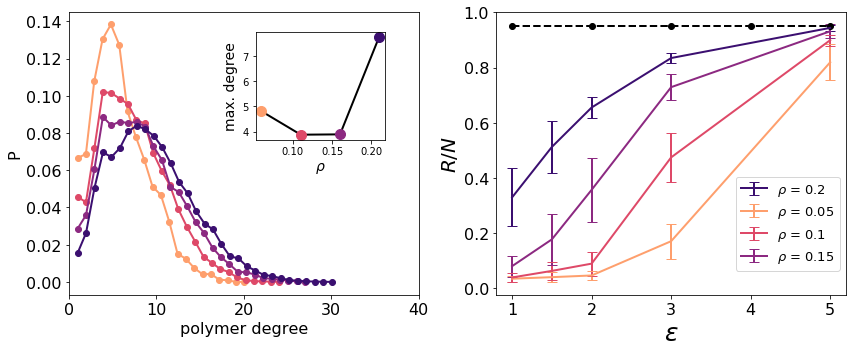

In [10]:
get_degree_and_domain_plot_pl(df,df_param,"rho","degree_domain_rho","$\\rho$", "polymer","magma_r")

## Crosslinker data 

In [11]:
dc,dc_param = parse_file('network_data_crosslinker_all_runs.pickle')

In [22]:
def get_degree_crosslinker_plot(df,df_param,std_cond,name,colormap):
    

    df_d = pd.DataFrame({"degree_sequence": df.groupby('state_id').degree_sequence.apply(list)}).reset_index()
    df_d.degree_sequence = df_d.degree_sequence.apply(lambda x: [ item for sublist in x for item in sublist])
    df_d = pd.merge(df_d,df_param, on='state_id')
    
    
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,5))
     
   
    # degree epsilon 
    max_total=15   
    x="epsilon"
    label="$\\epsilon$"
    brr = np.empty(len(df_d[x].unique()))  
    
    df_s = df_d
    for key, val in std_cond.items():
         if key!=x:
                df_s = df_s[df_s[key] == val]
    
    
    color_list = sns.color_palette(colormap, len(df_s[x].unique()))
    color_dict=dict(zip(sorted(df_s[x].unique()), color_list))    
    for lx, x_i in enumerate(sorted(df_s[x].unique())):
        
        
        di = df_s[(df_s[x] == x_i)]
        arr= di['degree_sequence'].values
        bins=np.max(arr[0])
        
        hist, bin_edges = np.histogram(np.array(arr[0]), bins=bins, normed=True, density=True)
        xarr = bin_edges[:-1]
        brr[lx] = xarr[np.argmax(hist)]      
                                      
                                      
        ax1.plot(xarr, hist, marker='o', color=color_dict[x_i], lw=2, label="{} = {}".format(label,x_i))
        ax1.set_xlabel("crosslinker degree", fontsize=16)
        ax1.set_ylabel("P", fontsize=16)
        ax1.set_xlim((0,max_total))
        ax1.set_ylim((0,1))
        ax1.tick_params(axis='both', which='major', labelsize=16)
        ax1.legend(ncol=1, loc='best', fontsize=10)
        plt.tight_layout()
     
    #axins1 = fig.add_axes([0.2, 0.4, 0.11, 0.22])
    #xl = np.array(sorted(df_d[x].unique())) 
    #axins1.plot(xl+0.01, brr, color='k', lw=2)
    #for i,x_i in enumerate(sorted(df_d[x].unique())):
    #    axins1.plot(xl[i]+0.01, brr[i], color=color_dict[x_i], marker='o', ms=10)
    
                   
    #axins1.set_ylabel("max. degree", size=14)
    #axins1.set_xlabel(label, size=14)

    
    # degree pl 
    max_total=15   
    x="plink"
    brr = np.empty(len(df_d[x].unique()))  
    label="$p_{l}$"
    
    df_s = df_d
    for key, val in std_cond.items():
         if key!=x:
                df_s = df_s[df_s[key] == val]
    
    color_list = sns.color_palette(colormap, len(df_s[x].unique()))
    color_dict=dict(zip(sorted(df_s[x].unique()), color_list))        
    for lx, x_i in enumerate(sorted(df_s[x].unique())):
        di = df_s[(df_s[x] == x_i)]
        print('di',di.head(20))
        arr= di['degree_sequence'].values
        bins=np.max(arr[0])
        
        hist, bin_edges = np.histogram(np.array(arr[0]), bins=bins, normed=True, density=True)
        xarr = bin_edges[:-1]
        brr[lx] = xarr[np.argmax(hist)]      
                                      
                                      
        ax2.plot(xarr, hist, marker='o', color=color_dict[x_i], lw=2, label="{} = {}".format(label,x_i))
        ax2.set_xlabel("crosslinker degree", fontsize=16)
        ax2.set_ylabel("P", fontsize=16)
        ax2.set_xlim((0,max_total))
        ax2.set_ylim((0,1))
        ax2.tick_params(axis='both', which='major', labelsize=16)
        ax2.legend(ncol=1, loc='best', fontsize=10)
        plt.tight_layout()
    
    #axins2 = fig.add_axes([0.55, 0.3, 0.11, 0.22])
    #xl = np.array(sorted(df_d[x].unique())) 
    #axins2.plot(xl+0.01, brr, color='k', lw=2)
    
    #for i,x_i in enumerate(sorted(df_d[x].unique())):
    #    axins2.plot(xl[i]+0.01, brr[i], color=color_dict[x_i], marker='o', ms=10)
                   
    #axins2.set_ylabel("max. degree", size=14)
    #axins2.set_xlabel(label, size=14)

    # degree kb
    max_total=15 
    x="kb"
    brr = np.empty(len(df_d[x].unique()))  
    label="$k_{b}$"
    
    df_s = df_d
    for key, val in std_cond.items():
         if key!=x:
                df_s = df_s[df_s[key] == val]
    
    color_list = sns.color_palette(colormap, len(df_s[x].unique()))
    color_dict=dict(zip(sorted(df_s[x].unique()), color_list))       
    for lx, x_i in enumerate(sorted(df_s[x].unique())):
        di = df_s[(df_s[x] == x_i)]
        arr= di['degree_sequence'].values
        bins=np.max(arr[0])
        
        hist, bin_edges = np.histogram(np.array(arr[0]), bins=bins, normed=True, density=True)
        print("kb hist")
        xarr = bin_edges[:-1]
        brr[lx] = xarr[np.argmax(hist)]      
                                      
                                      
        ax3.plot(xarr, hist, marker='o', color=color_dict[x_i], lw=2, label="{} = {}".format(label,x_i))
        ax3.set_xlabel("crosslinker degree", fontsize=16)
        ax3.set_ylabel("P", fontsize=16)
        ax3.set_xlim((0,max_total))
        ax3.set_ylim((0,1))
        ax3.tick_params(axis='both', which='major', labelsize=16)
        plt.tight_layout()
      
    #axins3 = fig.add_axes([0.3, 0.6, 0.15, 0.3])
    #xl = np.array(sorted(df_d[x].unique())) 
    #axins3.plot(xl+0.01, brr, color='k', lw=2)
    #for i,x_i in enumerate(sorted(df_d[x].unique())):
    #    axins3.plot(xl[i]+0.01, brr[i], color=color_dict[x_i], marker='o', ms=10)
    
    #axins3.set_ylabel("max. degree", size=14)
    #axins3.set_xlabel(label, size=14)
    
    ax3.legend(ncol=1, loc='best', fontsize=10)
    plt.savefig("{}_pl_kb_epsi_plot.pdf".format(name))




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipyker

di    state_id                                    degree_sequence     N    kb  \
38    00412  [10, 10, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8...  30.0  30.0   

    rho  plink  epsilon pstart  Nparticles  
38  0.2   0.05      5.0  00021       340.0  
di   state_id                                    degree_sequence     N    kb  \
4    00115  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9,...  30.0  30.0   

   rho  plink  epsilon pstart  Nparticles  
4  0.2    0.1      5.0  00061       340.0  


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:77: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.


di    state_id                                    degree_sequence     N    kb  \
42    00416  [14, 13, 12, 12, 12, 12, 11, 11, 11, 11, 11, 1...  30.0  30.0   

    rho  plink  epsilon pstart  Nparticles  
42  0.2   0.15      5.0  00021       340.0  


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:77: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.


di    state_id                                    degree_sequence     N    kb  \
46    00420  [13, 13, 12, 12, 12, 12, 12, 12, 12, 11, 11, 1...  30.0  30.0   

    rho  plink  epsilon pstart  Nparticles  
46  0.2    0.2      5.0  00021       340.0  


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:77: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:119: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.


kb hist
kb hist


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:119: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:119: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.


kb hist
kb hist


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:119: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:119: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.


kb hist


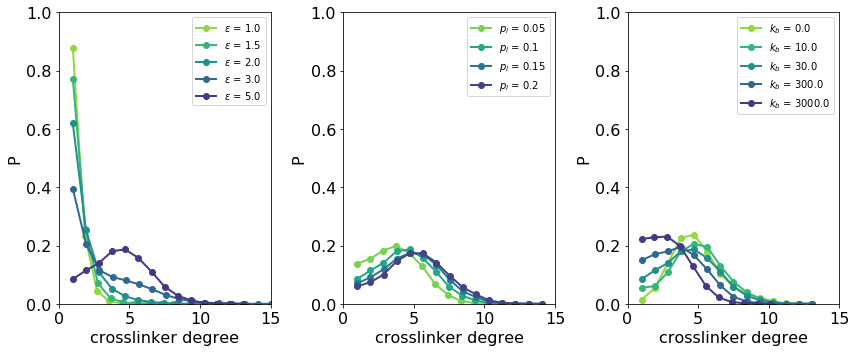

In [23]:

std_cond = {'epsilon':5, 'rho':0.2, 'kb':30,'N':30,'plink':0.1}
get_degree_crosslinker_plot(dc,dc_param,std_cond,"degree_crosslinker_kb_pl_epsilon","viridis_r")



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipyker

di    state_id                                    degree_sequence     N    kb  \
38    00412  [10, 10, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8...  30.0  30.0   

    rho  plink  epsilon pstart  Nparticles  
38  0.2   0.05      5.0  00021       340.0  
di   state_id                                    degree_sequence     N    kb  \
4    00115  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9,...  30.0  30.0   

   rho  plink  epsilon pstart  Nparticles  
4  0.2    0.1      5.0  00061       340.0  


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:77: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.


di    state_id                                    degree_sequence     N    kb  \
42    00416  [14, 13, 12, 12, 12, 12, 11, 11, 11, 11, 11, 1...  30.0  30.0   

    rho  plink  epsilon pstart  Nparticles  
42  0.2   0.15      5.0  00021       340.0  


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:77: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.


di    state_id                                    degree_sequence     N    kb  \
46    00420  [13, 13, 12, 12, 12, 12, 12, 12, 12, 11, 11, 1...  30.0  30.0   

    rho  plink  epsilon pstart  Nparticles  
46  0.2    0.2      5.0  00021       340.0  


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:77: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:119: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.


kb hist


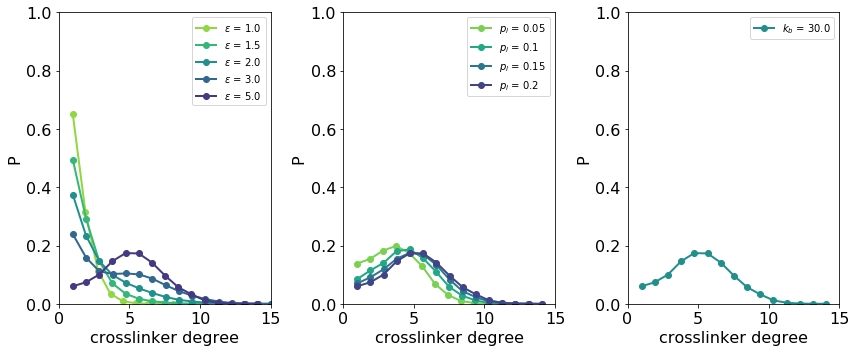

In [24]:
std_cond = {'epsilon':5, 'rho':0.2, 'kb':30,'N':30,'plink':0.2}
get_degree_crosslinker_plot(dc,dc_param,std_cond,"degree_crosslinker_kb_pl_epsilon","viridis_r")



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipyker

di    state_id                                    degree_sequence     N   kb  \
15    00364  [12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 10, 1...  30.0  0.0   

    rho  plink  epsilon pstart  Nparticles  
15  0.2    0.1      5.0  00021       340.0  


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:77: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:119: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.


kb hist
kb hist


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:119: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:119: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.


kb hist
kb hist


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:119: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:119: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.


kb hist


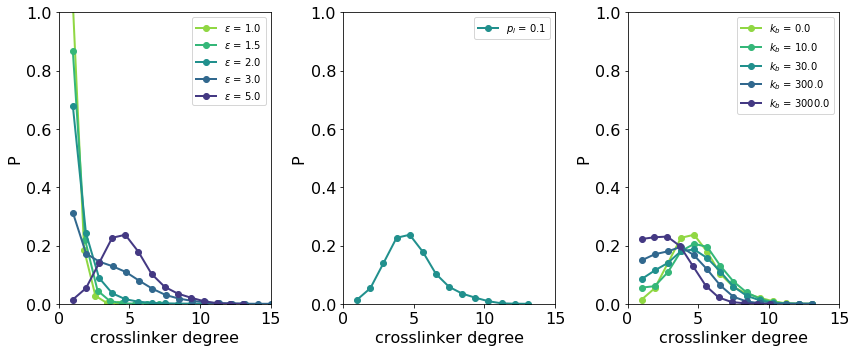

In [25]:
std_cond = {'epsilon':5, 'rho':0.2, 'kb':0,'N':30,'plink':0.1}
get_degree_crosslinker_plot(dc,dc_param,std_cond,"degree_crosslinker_kb_pl_epsilon","viridis_r")




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipyker

di    state_id                                    degree_sequence     N    kb  \
50    00424  [10, 10, 9, 9, 9, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7...  30.0  30.0   

     rho  plink  epsilon pstart  Nparticles  
50  0.05    0.1      5.0  00001        85.0  
kb hist


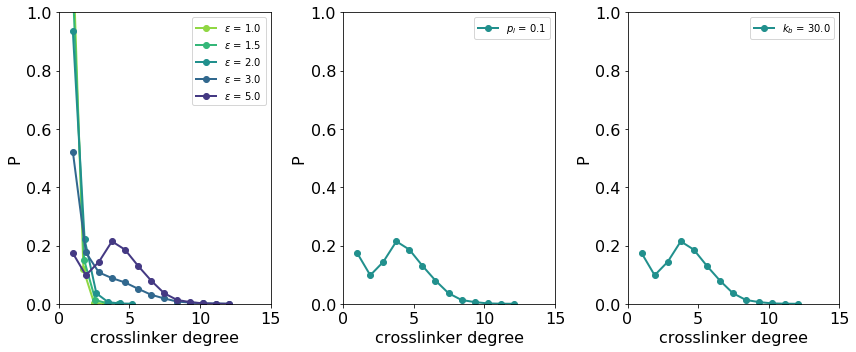

In [32]:
std_cond = {'epsilon':5, 'rho':0.05, 'kb':30,'N':30,'plink':0.1}
get_degree_crosslinker_plot(dc,dc_param,std_cond,"degree_crosslinker_kb_pl_epsilon","viridis_r")




,state_id,run_id,time,mean_degree,std_degree,degree_sequence,largest_domain,domain_lengths,node_connectivity,N,kb,rho,plink,epsilon,pstart,Nparticles
0,00321,00028,2450,1.341615,0.590879,"[4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",9.0,"[4, 3, 2, 3, 2, 2, 2, 4, 4, 2, 3, 4, 2, 2, 2, ...",0,30.0,30.0,0.15,0.1,2.0,00021,255.0
1,00321,00028,2451,1.324921,0.587818,"[4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",9.0,"[4, 3, 3, 2, 2, 2, 2, 4, 2, 2, 3, 2, 4, 2, 2, ...",0,30.0,30.0,0.15,0.1,2.0,00021,255.0
2,00321,00028,2452,1.349254,0.632779,"[4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",9.0,"[4, 2, 2, 3, 2, 2, 2, 3, 4, 2, 3, 2, 4, 2, 2, ...",0,30.0,30.0,0.15,0.1,2.0,00021,255.0
3,00321,00028,2453,1.319403,0.590532,"[4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",8.0,"[4, 2, 4, 2, 2, 2, 3, 2, 4, 2, 2, 2, 3, 2, 4, ...",0,30.0,30.0,0.15,0.1,2.0,00021,255.0
4,00321,00028,2454,1.357798,0.623538,"[4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",8.0,"[4, 2, 4, 2, 2, 2, 3, 3, 2, 2, 3, 7, 2, 2, 2, ...",0,30.0,30.0,0.15,0.1,2.0,00021,255.0


In [43]:
def get_domains_crosslinker_plot(df,df_param,std_cond,name,colormap):
    

    df_d = pd.DataFrame({"domain_lengths": df.groupby('state_id').domain_lengths.apply(list)}).reset_index()
    df_d.domain_lengths= df_d.domain_lengths.apply(lambda x: [ item for sublist in x for item in sublist])
    df_d = pd.merge(df_d,df_param, on='state_id')
    
    
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,5))
     
    max_ylim=0.3
    # degree epsilon 
    max_total=120  
    x="epsilon"
    label="$\\epsilon$"
    brr = np.empty(len(df_d[x].unique()))  
    
    df_s = df_d
    for key, val in std_cond.items():
         if key!=x:
                df_s = df_s[df_s[key] == val]
    
    
    color_list = sns.color_palette(colormap, len(df_s[x].unique()))
    color_dict=dict(zip(sorted(df_s[x].unique()), color_list))    
    for lx, x_i in enumerate(sorted(df_s[x].unique())):
        
        
        di = df_s[(df_s[x] == x_i)]
        arr= di['domain_lengths'].values
        bins=np.max(arr[0])
        
        hist, bin_edges = np.histogram(np.array(arr[0]), bins=bins, normed=True, density=True)
        xarr = bin_edges[:-1]
        brr[lx] = xarr[np.argmax(hist)]      
                                      
                                      
        ax1.plot(xarr, hist, color=color_dict[x_i], lw=2, label="{} = {}".format(label,x_i))
        ax1.set_xlabel("crosslinker cluster size", fontsize=16)
        ax1.set_ylabel("P", fontsize=16)
        ax1.set_xlim((0,max_total))
        ax1.set_ylim((0,max_ylim))
        ax1.tick_params(axis='both', which='major', labelsize=16)
        ax1.legend(ncol=1, loc='best', fontsize=10)
        plt.tight_layout()
     
    #axins1 = fig.add_axes([0.2, 0.4, 0.11, 0.22])
    #xl = np.array(sorted(df_d[x].unique())) 
    #axins1.plot(xl+0.01, brr, color='k', lw=2)
    #for i,x_i in enumerate(sorted(df_d[x].unique())):
    #    axins1.plot(xl[i]+0.01, brr[i], color=color_dict[x_i], marker='o', ms=10)
    
                   
    #axins1.set_ylabel("max. degree", size=14)
    #axins1.set_xlabel(label, size=14)

    
    # degree pl 
    
    x="plink"
    brr = np.empty(len(df_d[x].unique()))  
    label="$p_{l}$"
    
    df_s = df_d
    for key, val in std_cond.items():
         if key!=x:
                df_s = df_s[df_s[key] == val]
    
    color_list = sns.color_palette(colormap, len(df_s[x].unique()))
    color_dict=dict(zip(sorted(df_s[x].unique()), color_list))        
    for lx, x_i in enumerate(sorted(df_s[x].unique())):
        di = df_s[(df_s[x] == x_i)]
        print('di',di.head(20))
        arr= di['domain_lengths'].values
        bins=np.max(arr[0])
        
        hist, bin_edges = np.histogram(np.array(arr[0]), bins=bins, normed=True, density=True)
        xarr = bin_edges[:-1]
        brr[lx] = xarr[np.argmax(hist)]      
                                      
                                      
        ax2.plot(xarr, hist, color=color_dict[x_i], lw=2, label="{} = {}".format(label,x_i))
        ax2.set_xlabel("crosslinker cluster size ", fontsize=16)
        ax2.set_ylabel("P", fontsize=16)
        ax2.set_xlim((0,max_total))
        ax2.set_ylim((0,max_ylim))
        ax2.tick_params(axis='both', which='major', labelsize=16)
        ax2.legend(ncol=1, loc='best', fontsize=10)
        plt.tight_layout()
    
   
    # degree kb
   
    x="kb"
    brr = np.empty(len(df_d[x].unique()))  
    label="$k_{b}$"
    
    df_s = df_d
    for key, val in std_cond.items():
         if key!=x:
                df_s = df_s[df_s[key] == val]
    
    color_list = sns.color_palette(colormap, len(df_s[x].unique()))
    color_dict=dict(zip(sorted(df_s[x].unique()), color_list))       
    for lx, x_i in enumerate(sorted(df_s[x].unique())):
        di = df_s[(df_s[x] == x_i)]
        arr= di['domain_lengths'].values
        bins=np.max(arr[0])
        
        hist, bin_edges = np.histogram(np.array(arr[0]), bins=bins, normed=True, density=True)
        print("kb hist")
        xarr = bin_edges[:-1]
        brr[lx] = xarr[np.argmax(hist)]      
                                      
                                      
        ax3.plot(xarr, hist, color=color_dict[x_i], lw=2, label="{} = {}".format(label,x_i))
        ax3.set_xlabel("crosslinker cluster size", fontsize=16)
        ax3.set_ylabel("P", fontsize=16)
        ax3.set_xlim((0,max_total))
        ax3.set_ylim((0,max_ylim))
        ax3.tick_params(axis='both', which='major', labelsize=16)
        plt.tight_layout()
      
    #axins3 = fig.add_axes([0.3, 0.6, 0.15, 0.3])
    #xl = np.array(sorted(df_d[x].unique())) 
    #axins3.plot(xl+0.01, brr, color='k', lw=2)
    #for i,x_i in enumerate(sorted(df_d[x].unique())):
    #    axins3.plot(xl[i]+0.01, brr[i], color=color_dict[x_i], marker='o', ms=10)
    
    #axins3.set_ylabel("max. degree", size=14)
    #axins3.set_xlabel(label, size=14)
    
    ax3.legend(ncol=1, loc='best', fontsize=10)
    plt.savefig("{}_pl_kb_epsi_plot.pdf".format(name))




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipyker

di    state_id                                     domain_lengths     N    kb  \
38    00412  [5, 22, 2, 9, 20, 7, 9, 2, 2, 12, 9, 4, 20, 7,...  30.0  30.0   

    rho  plink  epsilon pstart  Nparticles  
38  0.2   0.05      5.0  00021       340.0  
di   state_id                                     domain_lengths     N    kb  \
4    00115  [14, 7, 13, 5, 24, 24, 31, 21, 21, 19, 6, 15, ...  30.0  30.0   

   rho  plink  epsilon pstart  Nparticles  
4  0.2    0.1      5.0  00061       340.0  
di    state_id                                     domain_lengths     N    kb  \
42    00416  [6, 16, 50, 37, 33, 40, 25, 10, 21, 21, 34, 14...  30.0  30.0   

    rho  plink  epsilon pstart  Nparticles  
42  0.2   0.15      5.0  00021       340.0  
di    state_id                                     domain_lengths     N    kb  \
46    00420  [24, 13, 23, 41, 45, 37, 20, 51, 14, 3, 68, 38...  30.0  30.0   

    rho  plink  epsilon pstart  Nparticles  
46  0.2    0.2      5.0  00021       340.0  


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:77: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:110: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:110: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:110: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipy

kb hist
kb hist
kb hist
kb hist
kb hist


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:110: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.


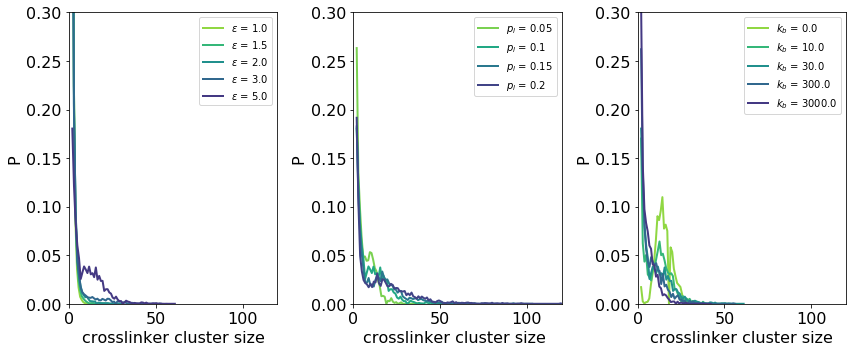

In [44]:
std_cond = {'epsilon':5, 'rho':0.2, 'kb':30,'N':30,'plink':0.1}
get_domains_crosslinker_plot(dc,dc_param,std_cond,"cluster_crosslinker_kb_pl_epsilon","viridis_r")


